In [1]:
%matplotlib widget
import obspy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
from hydrophone_data_processing import load, preprocessing, tempmatch
import matplotlib.dates as mdates

import matplotlib.ticker as ticker

class PrecisionDateFormatter(ticker.Formatter):
    """
    Extend the `matplotlib.ticker.Formatter` class to allow for millisecond
    precision when formatting a tick (in days since the epoch) with a
    `~datetime.datetime.strftime` format string.

    """

    def __init__(self, fmt, precision=3, tz=None):
        """
        Parameters
        ----------
        fmt : str
            `~datetime.datetime.strftime` format string.
        """
        from matplotlib.dates import num2date
        if tz is None:
            from matplotlib.dates import _get_rc_timezone
            tz = _get_rc_timezone()
        self.num2date = num2date
        self.fmt = fmt
        self.tz = tz
        self.precision = precision

    def __call__(self, x, pos=0):
        if x == 0:
            raise ValueError("DateFormatter found a value of x=0, which is "
                             "an illegal date; this usually occurs because "
                             "you have not informed the axis that it is "
                             "plotting dates, e.g., with ax.xaxis_date()")

        dt = self.num2date(x, self.tz)
        ms = dt.strftime("%f")[:self.precision]

        return dt.strftime(self.fmt).format(ms=ms)

    def set_tzinfo(self, tz):
        self.tz = tz

In [2]:
# import bubbles
bubbles = load.import_bubble_detections('/media/sda/data/borehole/detections/*.csv')
bubbles.reset_index(inplace=True)
# bubbles.ones.cumsum().plot(figsize=(15, 5))
# bubbles[bubbles.similarity>0.6].ones.cumsum().plot(figsize=(15, 5))

In [3]:
bubbles = bubbles[bubbles.time<'2020-01-05']

In [4]:
bubbles['timediff'] = bubbles.time.diff()

In [5]:
def get_seconds(t):
    if t == np.nan:
        return np.nan
    else:
        return t.seconds

In [6]:
bubbles['diffseconds'] = bubbles.timediff.apply(get_seconds)

In [7]:
bubbles.head()

,time,similarity,template_id,ones,timediff,diffseconds
0,2019-05-02 08:34:05.219999+00:00,0.879116,0,1,NaT,NaN
1,2019-05-02 08:34:56.173999+00:00,0.850827,0,1,0 days 00:00:50.954000,50.0
2,2019-05-02 10:27:54.056999+00:00,0.860519,0,1,0 days 01:52:57.883000,6777.0
3,2019-05-02 12:08:43.894999+00:00,0.906010,0,1,0 days 01:40:49.838000,6049.0
4,2019-05-02 12:09:15.602999+00:00,0.814478,0,1,0 days 00:00:31.708000,31.0


In [8]:
# bubbles.plot.scatter(x='similarity', y='diffseconds')

In [9]:
# bubbles.diffseconds.hist(bins=np.arange(0, 100, 1), log=True)

<AxesSubplot:xlabel='time'>

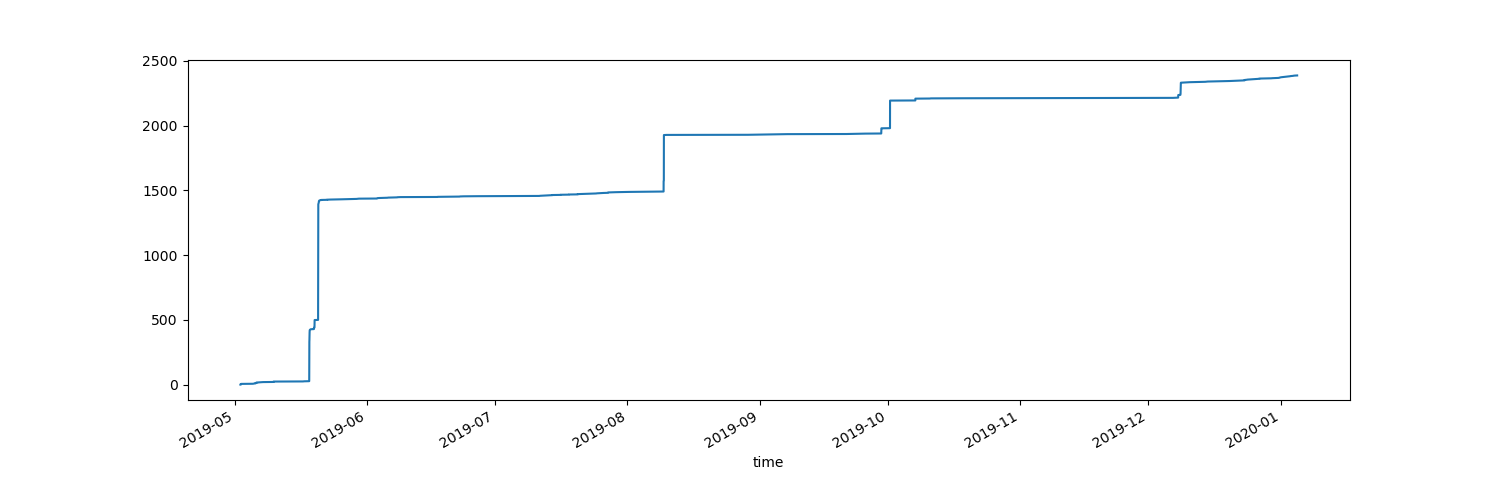

In [10]:
bubbles.set_index('time').cumsum().ones.plot(figsize=(15, 5))

In [11]:
36-17

19

In [ ]:
paths = ['/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.01.GDH.2019.138'
        ,'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.02.GDH.2019.138'
        ,'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.03.GDH.2019.138'
        ,'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.04.GDH.2019.138'
        ,'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.05.GDH.2019.138'
        ,'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.06.GDH.2019.138']

In [ ]:
day138 = load.import_corrected_data_for_single_day(paths=paths)

In [14]:
pd.to_datetime('08-09-2019') - pd.to_datetime('05-20-2019')

Timedelta('81 days 00:00:00')

In [15]:
pd.to_datetime('09-29-2019') - pd.to_datetime('08-09-2019')

Timedelta('51 days 00:00:00')

In [16]:
pd.to_datetime('12-07-2019') - pd.to_datetime('09-29-2019')

Timedelta('69 days 00:00:00')

In [17]:
np.mean([81, 51, 69])

67.0